# TASKS

1. Using kmeans, implement the **Bisecting k-means algorithm** on the same data. 
2. Compare your results with kmeans scatterplots.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestCentroid
warnings.filterwarnings('ignore')

print(".")
#importing libraries

.


In [3]:
#loading the dataset
data = pd.read_csv('clustering.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [4]:
#we will select the values of features 'ApplicationIncome' and 'LoanAmount'
data = data.loc[:, ['ApplicantIncome', 'LoanAmount']]
X_train = data.values
X_train[0], type(X_train[0][0]), len(X_train)

(array([4583.,  128.]), numpy.float64, 381)

In [5]:
#transforming data into standard normally distributed data
#improves estimator peformance
scaler = StandardScaler()
X = scaler.fit_transform(X_train)
X

array([[ 7.07468765e-01,  8.12575187e-01],
       [-4.08932206e-01, -1.37659578e+00],
       [-7.03018880e-01,  5.30101514e-01],
       [ 1.70679926e+00,  1.27159491e+00],
       [-8.79329836e-01, -3.52628717e-01],
       [-2.67883442e-01, -1.23535895e+00],
       [-7.61554118e-01,  1.41700212e-01],
       [-1.21784687e+00,  3.18246258e-01],
       [-1.60855195e+00, -3.10674704e+00],
       [ 9.66293248e-01,  7.06647560e-01],
       [ 1.13931122e-02, -1.76082671e-01],
       [-4.92578566e-02, -1.02350369e+00],
       [ 9.21862887e-01,  9.89121233e-01],
       [-6.91029735e-01,  3.53555468e-01],
       [ 2.87750401e+00, -3.48458338e-02],
       [-6.91029735e-01,  3.88864677e-01],
       [-1.51518211e-01,  2.47627840e-01],
       [-5.50686215e-01,  6.00719932e-01],
       [ 4.55696721e-01,  1.77009422e-01],
       [-1.50770208e+00, -2.47118127e+00],
       [ 1.20000661e-01,  5.30101514e-01],
       [-2.91156488e-01, -1.09412211e+00],
       [ 7.84340342e-01,  3.57725847e-02],
       [-5.

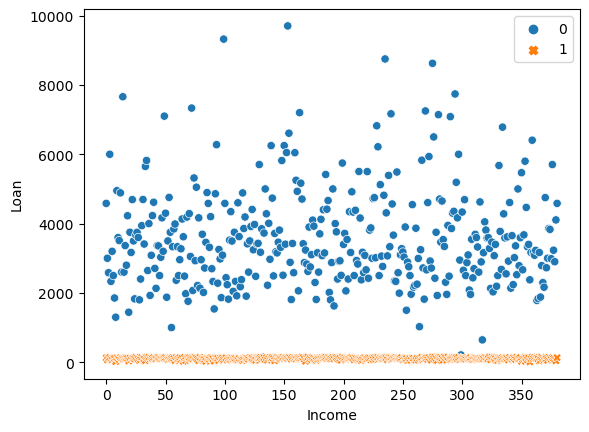

In [5]:
#see how the data looks without the standard scaler
sns.scatterplot(X_train)
plt.xlabel('Income')
plt.ylabel('Loan')
plt.show()

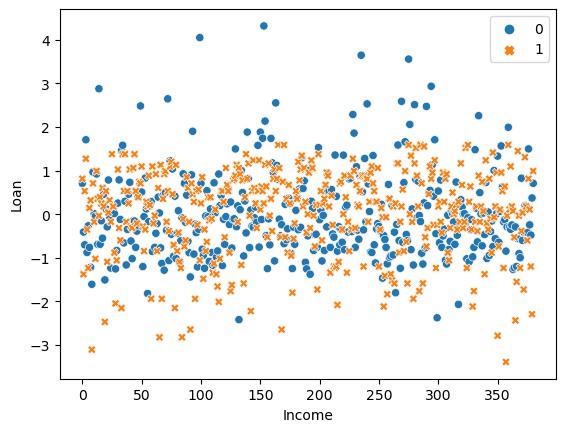

In [7]:
#drawing scatterplot of selected datapoints after standard scaler
sns.scatterplot(X)
plt.xlabel('Income')
plt.ylabel('Loan')
plt.show()

In [8]:
#testing kmeans algorithm
#create model with n_clusters=5 to begin with
#fit_predict computes cluster centers,
#predicts cluster index for each sample
kmeans_model = KMeans(n_clusters=5, random_state=0, n_init="auto")
ogclusters = kmeans_model.fit_predict(X)

ogclusters, len(ogclusters)

(array([3, 2, 4, 1, 0, 2, 0, 0, 2, 3, 3, 2, 3, 0, 1, 0, 3, 4, 3, 2, 3, 2,
        3, 3, 0, 4, 3, 2, 2, 2, 4, 3, 0, 2, 1, 4, 4, 0, 4, 3, 3, 0, 0, 4,
        4, 4, 0, 3, 4, 1, 3, 0, 2, 3, 3, 0, 4, 3, 2, 4, 0, 0, 4, 2, 3, 2,
        4, 2, 3, 4, 3, 0, 1, 0, 1, 4, 3, 0, 2, 4, 2, 3, 2, 2, 2, 3, 3, 0,
        3, 4, 0, 2, 3, 1, 0, 2, 4, 0, 4, 1, 3, 4, 2, 0, 2, 3, 3, 0, 3, 0,
        2, 2, 3, 2, 2, 2, 2, 3, 0, 3, 0, 4, 3, 3, 2, 2, 2, 4, 4, 1, 4, 3,
        0, 4, 2, 3, 2, 3, 4, 1, 3, 0, 2, 4, 4, 4, 3, 0, 1, 4, 1, 4, 1, 1,
        1, 4, 0, 4, 0, 1, 3, 3, 4, 1, 3, 3, 4, 0, 2, 4, 4, 3, 0, 2, 3, 3,
        2, 2, 0, 0, 3, 3, 4, 3, 4, 1, 3, 3, 0, 0, 0, 3, 0, 4, 4, 0, 0, 0,
        2, 1, 3, 3, 0, 3, 0, 3, 4, 3, 3, 2, 3, 0, 2, 3, 2, 2, 2, 4, 4, 0,
        3, 4, 3, 2, 0, 3, 3, 0, 1, 1, 0, 3, 0, 0, 3, 1, 3, 2, 1, 4, 1, 3,
        3, 4, 4, 1, 4, 0, 0, 4, 2, 0, 3, 0, 2, 2, 0, 2, 3, 0, 2, 2, 0, 2,
        0, 4, 1, 2, 0, 1, 4, 3, 1, 0, 2, 1, 1, 4, 3, 2, 1, 3, 4, 3, 2, 4,
        4, 2, 4, 0, 1, 3, 3, 3, 1, 3, 

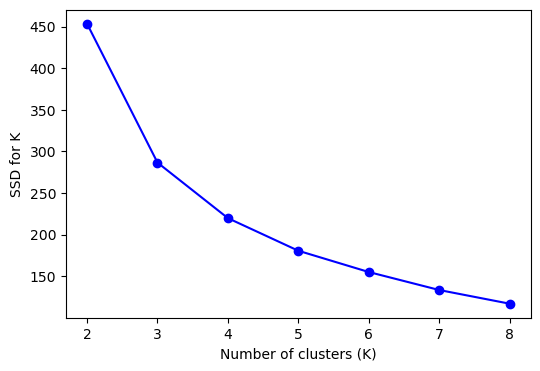

In [77]:
#use sum of squares distance (SSD)
#calculate within cluster sum of squares with euclidean distance
#sum values iterated through all points in cluster, divided by number of points

#[cluster, ssd]
ssd = []
for k in range(2, 9):
    kmeans_model = KMeans(n_clusters=k)
    kmeans_model.fit(X)
    ssd.append(kmeans_model.inertia_)
plt.figure(figsize=(6,4), dpi=100)
plt.plot(range(2, 9), ssd, color="blue", marker="o")
plt.xlabel("Number of clusters (K)")
plt.ylabel("SSD for K")
plt.show()

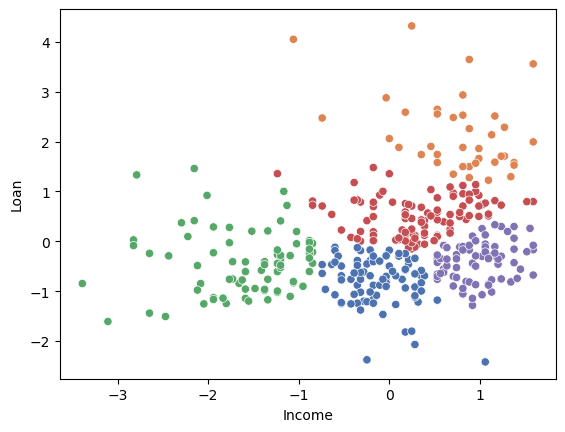

In [9]:
#this is how default Kmeans function operates with 5 clusters
sns.scatterplot(x=X[:,1],
                y=X[:,0],
                hue=ogclusters,
                palette="deep",
                legend = None
                )
plt.xlabel('Income')
plt.ylabel('Loan')
plt.show()

In [10]:
#creating bisecting kmeans algorithm
#start with two clusters and bisect from there
bkkm = KMeans(n_clusters=2, random_state=0, n_init="auto")
clusters = bkkm.fit_predict(X)

#ssd list keeps track of sum of squared errors for given index
#clusterings will be the list of clusters for given index
#clusterings[0] provides labels from 2 cluster from n_clusters=2
ssd = []
clusterings = []

#add info from n_clusters=2
clusterings.append(clusters)
ssd.append(bkkm.inertia_)

#bisect clusters until we reach 7 total clusters
#keep track of each label set, ssd per clustering
for i in range(0,5):
    cluster = []

    #retrieve clustering label set from previous iteration, cast to numpy array to avoid overwriting
    clusters = np.array(clusterings[i])

    #go through each sample in the list
    for k in range(len(clusters)):
        #if the sample matches the cluster that we are iterating on
        if clusters[k] == i:
            #add it to list of points to be bisected next
            cluster.append(X[k])

    #now we have all points in specified cluster,
    #we can bisect this cluster and continue with the next iteration

    #change cluster to a numpy array so we can bisect it
    cluster = np.array(cluster)

    #call kmeans model to bisect our cluster
    cluster = bkkm.fit_predict(cluster)
    #now the cluster is back to a list

    #add new sum of squared means to the list
    ssd.append(bkkm.inertia_)
    

    m = 0
    #reiterate through the original cluster label list
    for k in range(len(clusters)):
        #if the point was in the cluster that we bisected
        if clusters[k] == i:
            #if the point was labeled to be in the second part of the bisection
            if cluster[m] == 1:
                #update it in the clustering label list
                clusters[k] = i+2
            m += 1

    #add new clustering label list to the list
    clusterings.append(clusters)

#print results for each clustering list and print out the related sum of squared error of the new cluster
for i in range(len(clusterings)):
    print(i+2, '\n', clusterings[i], '\n', ssd[i], '\n')

2 
 [1 0 1 1 0 0 0 0 0 1 0 0 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 0 0 1 1 0 0 1 1 1
 0 1 1 1 0 0 1 1 1 0 1 1 1 1 0 0 1 1 0 1 1 0 1 0 0 1 0 1 0 1 0 1 1 1 0 1 0
 1 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 1 1 0 0 1 0 1 1 1 1 0 0 0 0 1 0 1 0 0
 0 1 0 0 0 0 1 0 1 0 1 1 1 0 0 0 1 1 1 1 1 0 1 0 1 0 1 1 1 1 0 0 1 1 1 1 0
 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 0 0 0 0 1 1 1 1 1
 1 1 1 0 0 0 1 0 1 1 0 0 1 0 1 1 1 0 1 0 1 1 1 1 0 1 0 0 0 0 0 0 1 1 0 1 1
 1 0 0 0 1 0 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 0 0 0 0 0 1
 0 0 0 0 0 0 1 1 0 0 1 1 0 1 0 0 1 1 1 1 0 1 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1
 1 1 0 0 1 0 1 0 1 1 1 1 0 0 0 1 1 1 0 1 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 1 1
 0 1 1 1 1 1 0 1 0 0 1 0 0 1 1 0 1 0 0 1 1 1 0 1 0 0 1 1 1 1 0 0 0 0 1 0 0
 1 0 0 1 1 0 1 1 0 0 1] 
 453.5681659194928 

3 
 [1 0 1 1 2 0 2 2 0 1 2 0 1 1 1 1 1 1 1 0 1 0 1 1 2 1 1 0 0 0 1 1 2 0 1 1 1
 2 1 1 1 2 2 1 1 1 2 1 1 1 1 2 0 1 1 2 1 1 0 1 2 2 1 0 1 0 1 0 1 1 1 2 1 2
 1 1 1 2 0 1 0 2 0 0 0 1 0 2 1 1 2 0 1 1 2 0 1

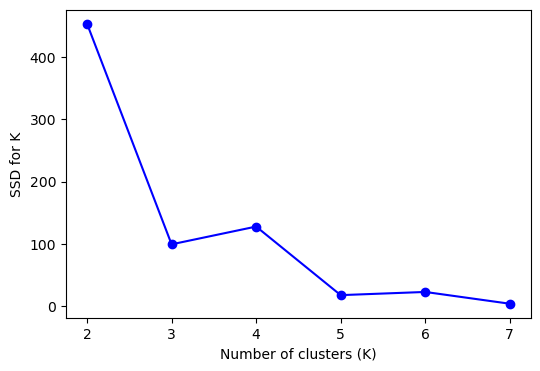

In [11]:
#use sum of squares distance (SSD)
#calculate within cluster sum of squares with euclidean distance
#sum values iterated through all points in cluster, divided by number of points
plt.figure(figsize=(6,4), dpi=100)
plt.plot(range(2, 8), ssd, color="blue", marker="o")
plt.xlabel("Number of clusters (K)")
plt.ylabel("SSD for K")
plt.show()

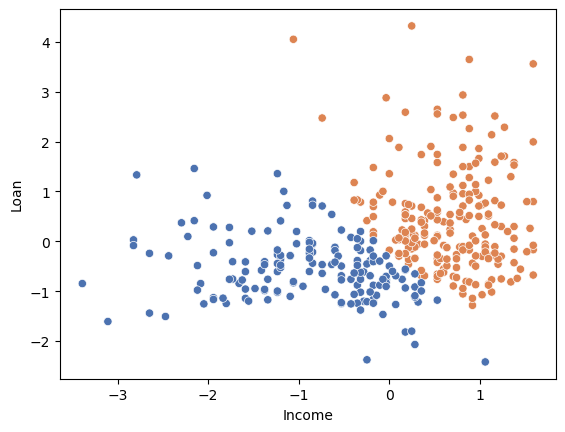

2 clusters, ssd = 453.5681659194928 



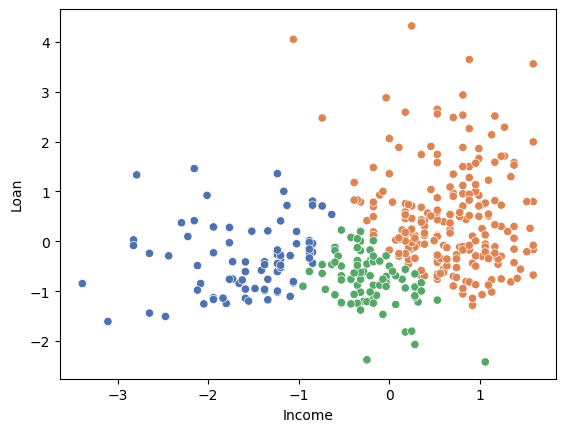

3 clusters, ssd = 99.37212558799598 



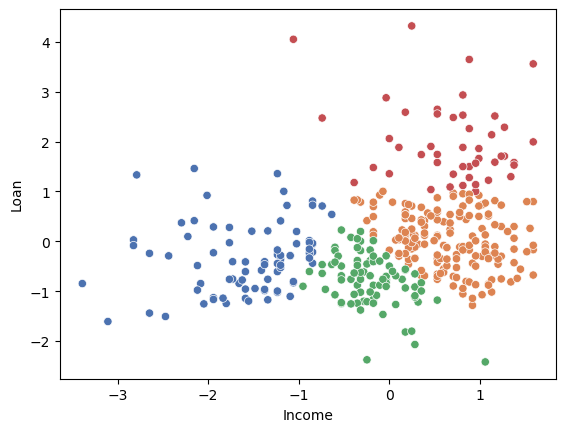

4 clusters, ssd = 127.88888085063338 



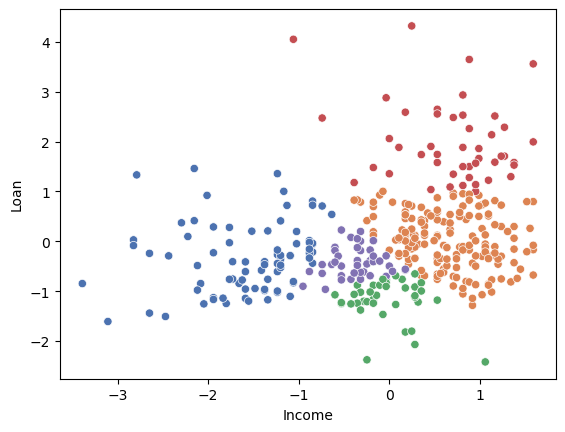

5 clusters, ssd = 17.791667794070815 



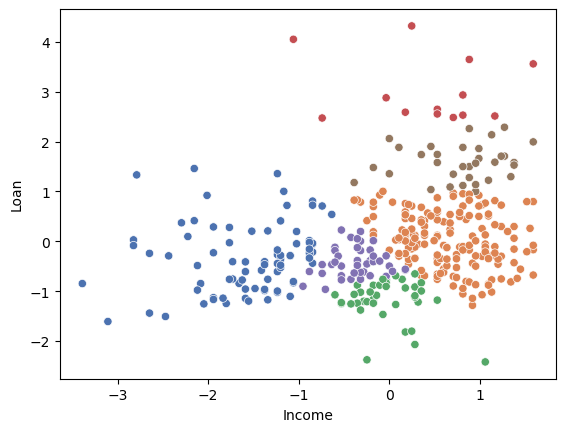

6 clusters, ssd = 22.9006885352956 



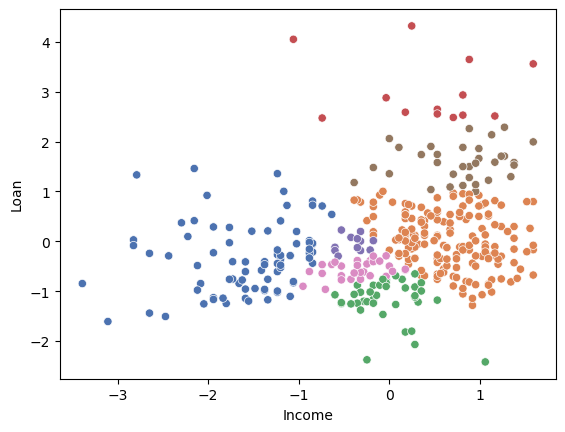

7 clusters, ssd = 3.9993283461736406 



In [13]:
for i in range(6):
    #produce plots for each given amount of clusters as they are bisected
    sns.scatterplot(x=X[:,1],
                    y=X[:,0],
                    hue=clusterings[i],
                    palette="deep",
                    legend = None
                    )
    plt.xlabel('Income')
    plt.ylabel('Loan')
    plt.show()
    print(i+2, 'clusters, ssd =', ssd[i], '\n')